In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from GraphGenerator import generate_curve_data, format_to_json, random_points_from_xs

def hermite_interpolate(x, x0, x1, y0, y1, m0, m1):
    """
    Hermite interpolation formula:
      t = (x - x0) / (x1 - x0)
      y = h00(t)*y0 + h10(t)*(x1 - x0)*m0 + h01(t)*y1 + h11(t)*(x1 - x0)*m1
    where:
      h00(t) = 2*t^3 - 3*t^2 + 1
      h10(t) = t^3 - 2*t^2 + t
      h01(t) = -2*t^3 + 3*t^2
      h11(t) = t^3 - t^2
    """
    t = (x - x0) / (x1 - x0)
    h00 = 2 * t**3 - 3 * t**2 + 1
    h10 = t**3 - 2 * t**2 + t
    h01 = -2 * t**3 + 3 * t**2
    h11 = t**3 - t**2
    return h00 * y0 + h10 * (x1 - x0) * m0 + h01 * y1 + h11 * (x1 - x0) * m1

def generate_random_slopes(points, extreme_prob=0.3, slope_range=(-3, 3)):
    """
    Generate random slopes for each control point:
      - With probability 'extreme_prob', assign a slope of 0 (encouraging local extrema)
      - Otherwise, assign a random slope uniformly from 'slope_range'
    """
    slopes = []
    for _ in points:
        if np.random.rand() < extreme_prob:
            slopes.append(0)
        else:
            slopes.append(np.random.uniform(slope_range[0], slope_range[1]))
    return slopes

def generate_curve_data(control_points, extreme_prob=0.3, slope_range=(-3, 3)):
    """
    Generate a list of interpolated points for a curve using Hermite interpolation.
    
    Parameters:
        control_points: list of control points in the format [(x0, y0), (x1, y1), ...]
                        Assumed to be in increasing order of x.
        extreme_prob: probability to assign a slope of 0 to a control point (to encourage local extrema)
        slope_range: range for generating random slopes for control points
        x_step: the step size for discretizing the x-axis between control points
    
    Returns:
        A list of points in the format [[x1, y1], [x2, y2], ..., [xn, yn]]
    """
    x_step = 0.1
    # Generate random slopes for the control points
    slopes = generate_random_slopes(control_points, extreme_prob, slope_range)
    curve_points = []
    
    # Interpolate between each pair of control points
    for i in range(len(control_points) - 1):
        x0, y0 = control_points[i]
        x1, y1 = control_points[i+1]
        m0 = slopes[i]
        m1 = slopes[i+1]
        
        # Generate x values in the interval [x0, x1] using the defined step
        xs = np.arange(x0, x1, x_step)
        # Ensure the right endpoint is included
        if xs.size == 0 or xs[-1] != x1:
            xs = np.append(xs, x1)
        # For subsequent segments, skip the first x to avoid duplicate points
        if i > 0:
            xs = xs[1:]
        
        # Compute interpolated y values for each x in the interval and append to the list
        for x in xs:
            y = hermite_interpolate(x, x0, x1, y0, y1, m0, m1)
            curve_points.append([x, y])
    
    return curve_points

def plot_curve_data(curve_points, control_points):
    """
    INPUT:  list :[[x, y], ...] as the control points
            list :[[x, y], ...] as the geenrated points
    """
    curve_points = np.array(curve_points)
    control_points = np.array(control_points)
    
    plt.figure(figsize=(10, 5))
    plt.plot(curve_points[:,0], curve_points[:,1], marker='o', linestyle='-', label='Interpolated Curve')
    plt.scatter(control_points[:,0], control_points[:,1], color='red', zorder=5, label='Control Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Hermite Interpolated Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

def format_to_json(curve_points):
    """
    INPUT:  list :[[x, y], ...]
    OUTPUT: {"points": [[x1, y1],[x2, y2],...,[xn, yn]]}
    """
    data = {
        "points": curve_points
    }
    return json.dumps(data)



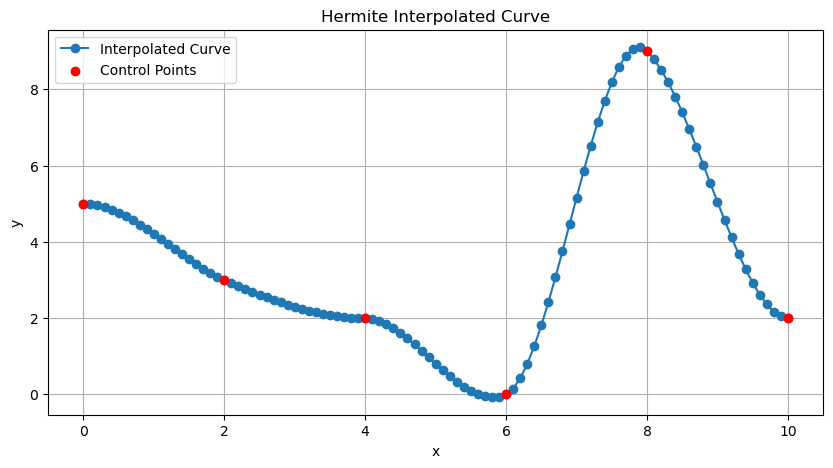

In [110]:
x_values = [0, 2, 4, 6, 8, 10]
points = random_points_from_xs(x_values)
curve_data = generate_curve_data(points, extreme_prob=0.5, slope_range=(-3, 3))
# print(curve_data)
plot_curve_data(curve_data, points)
# json_output = format_to_json(curve_data)
# print(json_output)